# Introducción al Análisis Exploratorio de Datos con Pandas

Què implica realizar un anàlsis exploratorio de datos?: Este enfoque consiste en un conjunto de tareas para analizar conjuntos de datos para poder encontrar sus principales caracteristicas.

Estas tareas en general comprenden todo lo que tenemos que hacer desde que se formula una pregunta interesante, se reunen los datos y se desarrolla el proceso necesario para **poder responder esa pregunta**.

Su Objetivo es:

- Entender los datos.
- Ver caracteristicas de los datos.
- Detectar irregularidades ('outliers') de los datos.
- Obtener valores estadisticos de los datos.
- Realizar visualizaciones rapidas que faciliten el proceso de exploracion.

Usualmente el resultado de este proceso suele presentarse en un reporte o un notebook, que reune codigo y visualizaciones para llegar a ciertas **conclusiones o insights**.

Suele ser un proceso iterativo, que se retroalimenta. Y en general realizaremos el análisis del mismo sobre uno o varios DFs.

La idea es empezar sin saber del DS y poco a poco entender què significan. 

## Temario

- Carga de informacion en un DataFrame
- Analizando propiedades especificas del set de datos
- Verificacion de Calidad de Datos
- Utilizando Visualizaciones para nuestro Analisis exploratorio
    - Examinando la distribucion de una variables
        - Histograma
        - Density Plot
    - Explorando relacion entre variables
        - Overlaid Histogram
        - Scatter Plot
        - Paiplot
    - Comparando Grupos o categorias
        - Box Plot
        - Bar Plot


In [5]:
#Importamos las librerias como siempre...(matplotlib y seaborn son las librerìas de visualizaciòn):
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## Analisis Exploratorio de Datos: Spotify - All Time Top 2000s Mega Dataset

Para comenzar a trabajar en la distintas operaciones que podemos realizar con un DF vamos a trabajar con el siguiente set de datos:

[https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset](https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset)

Este set contiene informacion de aquellas canciones que son consideradas las canciones mas populares por toda la comunidad que utiliza spotify en su playlist "All Time Top 2000s". Las canciones segun la descripcion pueden estar comprendidas entre 1956 a 2019. A su vez el set brinda una gran cantidad de estadisticas y features de audio que nos permitiran hacer una analisis interesante sobre el mismo.


### Carga de Informacion en un Dataframe

Como usualmente hacemos cargamos la información en un DF leyendo el csv mediante la fucniòn de pandas ```read_csv```.  Y asì ver inicialmente parte del data frame para tener idea de la estructura del mismo.

In [6]:
#Acà antes tenìa lineas donde puso lo de autenticaciòn con google colab y luego
#al parecer cargò el csv ahi... NO hice esto ya que no voy a usar colab ahora.

# %timeit sirve para evaluar el tiempo de ejecucion
spotify_songs = pd.read_csv('data/Spotify-2000.csv')
spotify_songs.head()
#Vemos abajo que tenemos el titulo, artista, genero principal, año donde saliò esa cancion y distintas mètrics... BPM, Energy, Banceability (Seguramente sea què tan bailable es la canciòn), LOudness es el nivel de volumen y demàs features..

#Esta es la descripciòn màs detalladas que sacamos de Kaggle:
    #Index: ID
    #Title: Name of the Track
    #Artist: Name of the Artist
    #Top Genre: Genre of the track
    #Year: Release Year of the track
    #Beats per Minute(BPM): The tempo of the song
    #Energy: The energy of a song - the higher the value, the more energtic. song
    #Danceability: The higher the value, the easier it is to dance to this song.
    #Loudness: The higher the value, the louder the song.
    #Valence: The higher the value, the more positive mood (humor) for the song.
    #Length: The duration of the song.
    #Acoustic: The higher the value the more acoustic the song is.
    #Speechiness: The higher the value the more spoken words the song contains
    #Popularity: The higher the value the more popular the song is.

Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68               201            94            3          71  
1        17       81               207            17            7          39  
2         7       52               341             2           17          69  
3         3       37               269             0            4          76  
4        10       87               256             1            3          59

In [7]:
# Ahora vemos la informacion de las distintas columnas o atributos que tenemos en el DF:
spotify_songs.info()

#Y vemos data de la memoria que esta utilizamos como vimos anteriormente en la Parte1.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [10]:
#Vemos las dimensiones del data frame (rows x columns)
print(spotify_songs.shape)

#Vemos que tenemos 1994 canciones... las 2000 canciones no estarìan completas.

(1994, 15)


In [11]:
# En caso de ser una serie devuelve el numero de rows
# En caso de ser un DF (nuestro caso) devuelve el numero de rows x el numero de columns 
spotify_songs.size

29910

In [12]:
# Contamos la cantidad de elementos elementos no nulos en el DF
spotify_songs.count()

#Vemos que tenemos 1994 registros para cada feature... entonces NO tenemos valores nulos y no tendrìamos que hacer nada respecto a esto. 

Index                     1994
Title                     1994
Artist                    1994
Top Genre                 1994
Year                      1994
Beats Per Minute (BPM)    1994
Energy                    1994
Danceability              1994
Loudness (dB)             1994
Liveness                  1994
Valence                   1994
Length (Duration)         1994
Acousticness              1994
Speechiness               1994
Popularity                1994
dtype: int64

### Analizando propiedades especificas del set de datos

Para poder comenzar a orientar nuestro analisis podemos por ejemplo querer comenzar a analizar algunas variables que nos interesan para aplicar en nuestros analisis.

De esta manera podemos empezar a ver variables categòricas que nuestro set de datos puede llegar a tener. 

Podemos por ejemplo comenzar con los **Generos musicales** (columna  ```Top Genre```)


In [13]:
genres = spotify_songs['Top Genre']

In [14]:
type(genres)   #Vemos que es una serie. 

pandas.core.series.Series

In [15]:
# Ahora obtenemos la cantidad de valores que hay para cada una de las main_categories 
# (estamos contando los proyectos por categoria principal)
genres.value_counts()

#Y vemos que tenemos la categoria album rock con la mayor cantidad de canciones; y muchas categorìas con solo 1 canciòn (las ùltimas).

#POr esto no podemos simplemente poner esta variable como categòrica ya que son muchas.

album rock               413
adult standards          123
dutch pop                 88
alternative rock          86
dance pop                 83
                        ... 
alaska indie               1
uk pop                     1
ccm                        1
streektaal                 1
australian indie folk      1
Name: Top Genre, Length: 149, dtype: int64

Ahora vamos a hacer algo similar con otra variable... vamos a ver los posibles valores que podemos tener de **Artistas**, para ver si tenemos artistas que tiene mayor representacion en el set de datos, y tal vez algunos one hit wonders (osea 1 canciòn de un grupo que fue muy conocida... pero el resto de sus canciones no fue tanto).

In [16]:
artists = spotify_songs['Artist']
artists.value_counts()

#Vemos que arriba tenemos grupos muy conocidos que sacaron bastantes canciones exitosas y abajo tenemos los
#famosos 'one hit wonders' con 1 sola cancion conocida.

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
                      ..
Billie Eilish          1
Yann Tiersen           1
André Hazes Jr.        1
MGMT                   1
Armand                 1
Name: Artist, Length: 731, dtype: int64

De esta manera, generos musicales y artistas los podrìamos utilizar como variables categoricas para usarlas en nuestro analisis. De esta manera podremos utilizarlas para agrupar o dividir informacion, o filtrar informacion a considerar en el anàlisis. Sin embargo, tenemos que ver que tratamiento le damos a la misma ya que en ambos casos, al ser la clasificacion tal vez muy especifica, tenemos muchos Artistas o Generos con un unico elemento.

Vamos a aplicar un analisis màs extenso a los generos y artistas...

In [17]:
# Veamos los gèneros con solo 1 ùnica canciòn:
genres_counts = genres.value_counts()
genres_with_one_song = genres_counts[genres_counts == 1]
genres_with_one_song.count()

54

In [19]:
len(genres.unique()) #Acà vemos los gèneros totales que tenemos

149

Esto nos indica que aproximamente 1/3 de los generos que tenemos tienen una unica cancion (54 de los 149). 
Veamos ahora que sucede con los Artistas.

In [18]:
# Veamos los artistas con solo 1 ùnica canciòn:
artists_counts = artists.value_counts()
artists_with_one_song = artists_counts[artists_counts==1]
artists_with_one_song.count()

410

In [19]:
len(artists.unique())

731

Por lo que podemos ver que mas del 50% de los artistas que tenemos solamente tiene una cancion en el listado.
Podemos tomar esto en consideracion esto luego para el analisis, usandolas como variables categoricas y al mismo tiempo considerando si tenemos que considerarlas en grupos separados para el analisis (Por ejemplo en el caso de los artistas separar aquellos que tienen solamente una cancion popular, los *one hit wonders*).

POr otro lado vamos a analizar la columna **Year** para entender su uso en el data set.


In [21]:
spotify_songs['Year'].value_counts()

#Vemos que tenemos info de cuantas canciones tenemos para los distintos años. 

2008    54
2018    52
1991    52
1977    51
2002    47
        ..
1962     3
1959     3
1961     1
1960     1
1956     1
Name: Year, Length: 63, dtype: int64

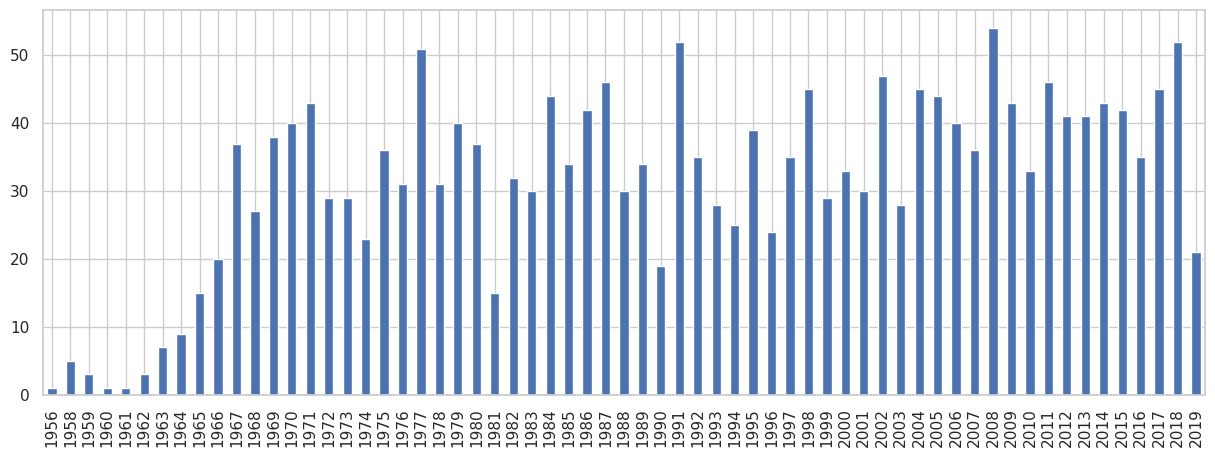

In [23]:
#Vamos a hacer un plot para mostrar lo de arriba... asi vemos que medianamente las canciones estan distribuidas... excepto en los 1ros años donde hay pocas canciones.
spotify_songs['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5)) 

#Arriba hacemos un sort_index() para que la serie nos quede ordenada por el año. Y con 'bar' hacemos un gràfico de barras.
#Asi podemos ver año a año cuantas canciones tenemos. 

En ese sentido podemos ver que en lineas generales tenemos de represetancion de todas las decadas musicales en los datos que estamos analizando. No hay tendencias que nos hagan pensar que tenemos menos canciones en una determinada dècada (bueno, a excepciòn de la 1ra dècada que hay pocas). 

Por otro lado podemos analizar algunos de los campos numericos que tenemos en el set que nos indican informacion sobre la cancion, por ejemplo: ```Beats Per Minute (BPM)```. Usualmente los BPM se suelen usar para medir el Tiempo o Tempo de una cancion, que entendemos como la velocidad que tiene una cancion. Esto es de interes al analizar generos musicales... donde hay algunos Tempos promedio que son usuales para ciertos generos musicales.

Mas informacion aqui: https://learningmusic.ableton.com/make-beats/beat-and-tempo.html

In [24]:
#POr esto vamos a ver que sucede con estos BPM...
spotify_songs['Beats Per Minute (BPM)']

#Vemos en la serie de abajo que tenemos distintos valores... pero mirando esta serie mucha data no nos dà. 

0       157
1       135
2       168
3       173
4       106
       ... 
1989     94
1990    175
1991    168
1992    174
1993    133
Name: Beats Per Minute (BPM), Length: 1994, dtype: int64

Sobre este tipo de variables podemos realizar algunos plots rapidos por ejemplo para entender en nuestros datos como se encuentran distribuidos, por ejemplo podriamos querer la distribucion de estos datos, haciendolo con un histograma.

Text(0, 0.5, 'Frecuencia')

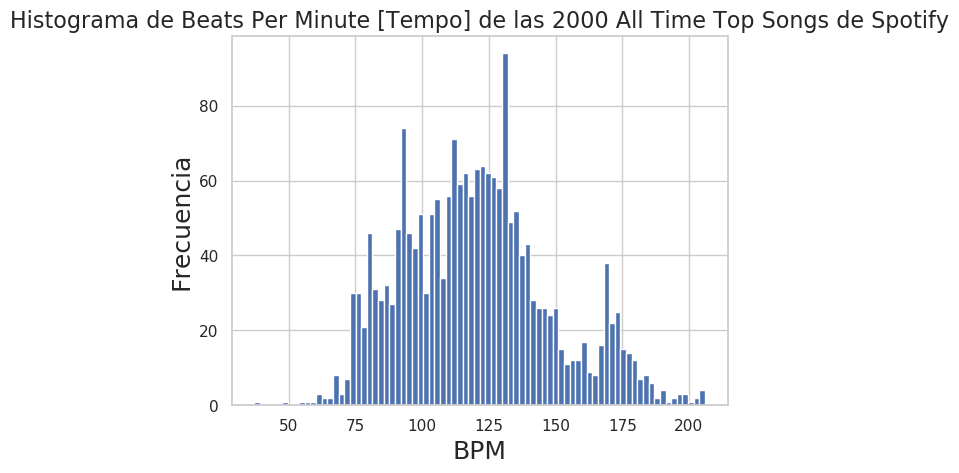

In [29]:
#Asì, para ver còmo se encuentran distribuidos los BPM en nuestro set de datos graficamos un histograma:
h = spotify_songs['Beats Per Minute (BPM)'].plot(kind='hist', bins=80)
h.set_title("Histograma de Beats Per Minute [Tempo] de las 2000 All Time Top Songs de Spotify", fontsize=16)
h.set_xlabel("BPM",fontsize=18)
h.set_ylabel("Frecuencia", fontsize=18)

#VER NUEVAMENTE ESTE HISTORIGRAMA, NO LO ENTENNDI. (no entendì el eje de frecuencia màs que nada.. que es ese 80? despues eje x son los valos de BPM) 

#AL parecer podemos considerar BPM como una distribuciòn normal viendo el grafico de abajo... entonces
#vemos que en torno de los 120-125 tenemos la mayor frecuencia (Esto tambien lo observamos con el '.describe()' que hacemos maaas abajo que nos tira
#una media de 120 para esta feature)

Otro atributo o columna que puede resultarnos interesante es el de duracion de las canciones en la columna ```Length```, pudiendo hacer un analisis similar al anterior.

### Analizando utilizacion de memoria del dataframe

Ahora vamos a realizar un analisis de utilizacion de memoria del DF para poder realizar mejoras en el uso de recursos. Pero como se trata de un DF bastante pequeño no serìa necesario esto... pero si despuès aplicariamos algùn algoritmo de ML mejor serìa optimizar nuestros recursos. 

In [30]:
# Obtenemos los datatypes que estamos utilizando:
spotify_songs.dtypes

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

In [33]:
# Mejor con .info vemos info general del DF (cantidad de rows, si tiene campos nulos y el tipo)
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [37]:
#Vemos que contiene 1994 valores no nulos, al parecer es un DS bastante limpio.

#Ahora vamos a ver el uso en bytes de cada columna en bytes:
spotify_songs.memory_usage(deep=False) # la opcion deep no permite analizar en profundidad el uso que se esta haciendo de memoria a nivel sistema

Index                       128
Index                     15952
Title                     15952
Artist                    15952
Top Genre                 15952
Year                      15952
Beats Per Minute (BPM)    15952
Energy                    15952
Danceability              15952
Loudness (dB)             15952
Liveness                  15952
Valence                   15952
Length (Duration)         15952
Acousticness              15952
Speechiness               15952
Popularity                15952
dtype: int64

In [39]:
#Obtenemos la suma total de dichas memorias en KB (en el ejemplo anterior 'Parte 1-' lo habiamos hecho con MB):
(spotify_songs.memory_usage() / (1024)).sum() 

233.796875

Al contar con informacion sobre las columnas del DF o analizandolas podemos hacer mejoras en el uso de los tipos del DF de tal forma de optimizar el uso de memoria. Los dtypes usados por pandas son esencialmente los dtypes de NumPy.

### Verificacion de Calidad de Datos

Algunas verificaciones que son utiles para ver la consistencia de los datos, en particular si vienen de una fuente de ese tipo.

Podemos verificar las dimensiones del data frame (via ```.shape```), si existen valores nulos (via ```.insnull```) en el mismo y metricas generales de las columnas o features del data frame que podemos analizar via ```.describe```

In [40]:
spotify_songs.isnull().any() #Asi vemos si existen nulos. 

Index                     False
Title                     False
Artist                    False
Top Genre                 False
Year                      False
Beats Per Minute (BPM)    False
Energy                    False
Danceability              False
Loudness (dB)             False
Liveness                  False
Valence                   False
Length (Duration)         False
Acousticness              False
Speechiness               False
Popularity                False
dtype: bool

In [41]:
spotify_songs.isnull().sum()  #Sumamos los nulos totales

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

Vemos que NO tenemos ningùn valor nulo... es un DS bastante limpio.
La informacion que podemos considerar en relacion a los nulos nos permite guiarnos sobre la calidad del set de datos que tenemos y casos en los que podemos ver por ejemplo que datos utilizar o no sobre nuestros analisis o si eventualmente tenemos que realizar algun otro tipo de informacion

In [44]:
spotify_songs.describe() # Para obtener metricas/estadìsticas generales de las columnas o features numericos del DF que podemos analizar.

#Describe sin parametros calcula ciertas estadìsticas (count, mean, etc) para ciertos tipos de datos (Solo los numèricos).

Index                 Year  Beats Per Minute (BPM)  \
count             1,994.00             1,994.00                1,994.00   
mean                997.50             1,992.99                  120.22   
std                 575.76                16.12                   28.03   
min                   1.00             1,956.00                   37.00   
25%                 499.25             1,979.00                   99.00   
50%                 997.50             1,993.00                  119.00   
75%               1,495.75             2,007.00                  136.00   
max               1,994.00             2,019.00                  206.00   

                    Energy         Danceability        Loudness (dB)  \
count             1,994.00             1,994.00             1,994.00   
mean                 59.68                53.24                -9.01   
std                  22.15                15.35                 3.65   
min                   3.00                10.00               -27.00   
25%                  42.00                43.00               -11.00   
50%                  61.00                53.00                -8.00   
75%                  78.00                64.00                -6.00   
max                 100.00                96.00                -2.00   

                  Liveness              Valence         Acousticness  \
count             1,994.00             1,994.00             1,994.00   
mean                 19.01                49.41                28.86   
std                  16.73                24.86                29.01   
min                   2.00                 3.00                 0.00   
25%                   9.00                29.00                 3.00   
50%                  12.00                47.00                18.00   
75%                  23.00                69.75                50.00   
max                  99.00                99.00                99.00   

               Speechiness           Popularity  
count             1,994.00             1,994.00  
mean                  4.99                59.53  
std                   4.40                14.35  
min                   2.00                11.00  
25%                   3.00                49.25  
50%                   4.00                62.00  
75%                   5.00                71.00  
max                  55.00               100.00

Para nuestros analisis y considerando los valores de media y desviacion sacamos algunas conclusiones:

- Podemos ver que la media de BPM es de aprox 120 BPMs como analizamos antes con el histograma, y no tiene demasiada dispersion (std=28). 120 BPMs es un valor bastante standard de tempo de canciones en general.. es algo de las canciones populares.
- Por alguna razon no vemos informacion estadistica sobre la de duracion de la cancion, punto que deberiamos indagar ya que deberìa ser una variable numèrica --> Length (Duration) para asì luego hacer estadìsticas con el tiempo. 
- Hay distintos niveles de variacion en los otros atributos que tenemos del set de datos y podriamos utilizarlos para analisis de distintos tipos si quisieramos por ejemplo explorar distintas caracteristicas que pueden tener los mismos.

In [45]:
spotify_songs.describe(include='all') #con include='all' como parametro en .describe() vamos a incluir absolutamente TODOS los features que tenemos... 
#Y vemos que para 'Length (Duration)' NO puede calcular ninguna variable estadìstica. 

Index         Title Artist   Top Genre  \
count              1,994.00          1994   1994        1994   
unique                  nan          1958    731         149   
top                     nan  Feeling Good  Queen  album rock   
freq                    nan             3     37         413   
mean                 997.50           NaN    NaN         NaN   
std                  575.76           NaN    NaN         NaN   
min                    1.00           NaN    NaN         NaN   
25%                  499.25           NaN    NaN         NaN   
50%                  997.50           NaN    NaN         NaN   
75%                1,495.75           NaN    NaN         NaN   
max                1,994.00           NaN    NaN         NaN   

                       Year  Beats Per Minute (BPM)               Energy  \
count              1,994.00                1,994.00             1,994.00   
unique                  nan                     nan                  nan   
top                     nan                     nan                  nan   
freq                    nan                     nan                  nan   
mean               1,992.99                  120.22                59.68   
std                   16.12                   28.03                22.15   
min                1,956.00                   37.00                 3.00   
25%                1,979.00                   99.00                42.00   
50%                1,993.00                  119.00                61.00   
75%                2,007.00                  136.00                78.00   
max                2,019.00                  206.00               100.00   

               Danceability        Loudness (dB)             Liveness  \
count              1,994.00             1,994.00             1,994.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean                  53.24                -9.01                19.01   
std                   15.35                 3.65                16.73   
min                   10.00               -27.00                 2.00   
25%                   43.00               -11.00                 9.00   
50%                   53.00                -8.00                12.00   
75%                   64.00                -6.00                23.00   
max                   96.00                -2.00                99.00   

                    Valence Length (Duration)         Acousticness  \
count              1,994.00              1994             1,994.00   
unique                  nan               350                  nan   
top                     nan               215                  nan   
freq                    nan                23                  nan   
mean                  49.41               NaN                28.86   
std                   24.86               NaN                29.01   
min                    3.00               NaN                 0.00   
25%                   29.00               NaN                 3.00   
50%                   47.00               NaN                18.00   
75%                   69.75               NaN                50.00   
max                   99.00               NaN                99.00   

                Speechiness           Popularity  
count              1,994.00             1,994.00  
unique                  nan                  nan  
top                     nan                  nan  
freq                    nan                  nan  
mean                   4.99                59.53  
std                    4.40                14.35  
min                    2.00                11.00  
25%                    3.00                49.25  
50%                    4.00                62.00  
75%                    5.00                71.00  
max                   55.00               100.00

Evidentemente existe algun problema sobre el campo que nos da informacion de la duracion de la cancion ('Length (Duration)'), dado que no se pueden calcular estadisticas sobre el mismo. Veamos nuevamente la salida de ```.info``` para tener mas detalles del tratamiento que le esta dando pandas al respecto.

In [33]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [47]:
# Vemos que la columna para Length (Duration) es de Dtype object lo cual nos indica que es posible que haya algun tipo de problema con el campo.
spotify_songs["Length (Duration)"]

0       201
1       207
2       341
3       269
4       256
       ... 
1989    128
1990    136
1991    162
1992    324
1993    148
Name: Length (Duration), Length: 1994, dtype: object

In [48]:
#Primero vamos a intentar castear el tipo de dato de esa columna:
spotify_songs["Length (Duration)"].astype('int64')

#Pero nos tira un ERROR (value_error) --> ' invalid literal for int() with base 10: '1,412''
#Nos dice que no se puede hacer el casteo porque tenemos un valor 1412.
#NO ENTENDI PORQUE ME DICE ESTE ERROR.

ValueError: invalid literal for int() with base 10: '1,412'

In [50]:
#Algo para solucionar esto es reemplazando las comas por vacios y ahi si lo pasamos a int64:
spotify_songs["Length (Duration)"] = spotify_songs["Length (Duration)"].str.replace(',','').astype('int64')

In [49]:
#Y asi si podemos sacar por ej. ahora la media:
spotify_songs["Length (Duration)"].str.replace(',','').astype('int64').mean()

262.4433299899699

In [51]:
spotify_songs.info() #Y ahora imprimimos info nuevamente y vemos que el tipo 
#de dato para Length (Duration) es int64, BIEN!.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

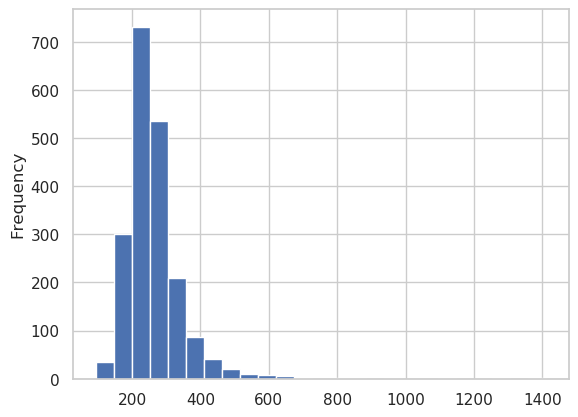

In [53]:
#Ahora hacemos un histograma viendo la distribuciòn de la duraciòn de la canciòn... y vemos
#que tenemos una cancion bastante larga seguramente que dura 1400 segundos (ABAJO hice un max y vi eso)
spotify_songs["Length (Duration)"].plot(kind='hist', bins=25)

In [52]:
spotify_songs["Length (Duration)"].max() #Vemos la canciòn que nos pone arriba y por eso "estira" el gràfico a la derecha.

1412

In [54]:
spotify_songs.describe() #Vemos todos los valores estadisticos nuevamente y ahora contamos 
#con todas las estadisticas para la columna Length (Duration).

Index                 Year  Beats Per Minute (BPM)  \
count             1,994.00             1,994.00                1,994.00   
mean                997.50             1,992.99                  120.22   
std                 575.76                16.12                   28.03   
min                   1.00             1,956.00                   37.00   
25%                 499.25             1,979.00                   99.00   
50%                 997.50             1,993.00                  119.00   
75%               1,495.75             2,007.00                  136.00   
max               1,994.00             2,019.00                  206.00   

                    Energy         Danceability        Loudness (dB)  \
count             1,994.00             1,994.00             1,994.00   
mean                 59.68                53.24                -9.01   
std                  22.15                15.35                 3.65   
min                   3.00                10.00               -27.00   
25%                  42.00                43.00               -11.00   
50%                  61.00                53.00                -8.00   
75%                  78.00                64.00                -6.00   
max                 100.00                96.00                -2.00   

                  Liveness              Valence    Length (Duration)  \
count             1,994.00             1,994.00             1,994.00   
mean                 19.01                49.41               262.44   
std                  16.73                24.86                93.60   
min                   2.00                 3.00                93.00   
25%                   9.00                29.00               212.00   
50%                  12.00                47.00               245.00   
75%                  23.00                69.75               289.00   
max                  99.00                99.00             1,412.00   

              Acousticness          Speechiness           Popularity  
count             1,994.00             1,994.00             1,994.00  
mean                 28.86                 4.99                59.53  
std                  29.01                 4.40                14.35  
min                   0.00                 2.00                11.00  
25%                   3.00                 3.00                49.25  
50%                  18.00                 4.00                62.00  
75%                  50.00                 5.00                71.00  
max                  99.00                55.00               100.00

Por ultimo volvemos a hacer una verificacion de valores nulos para tomar la decision si tenes que hacer algun tipo de tratamiento extra para los mismos.

In [56]:
spotify_songs.isnull().any()   #Vemos que no tenemos ningùn valor nulo, PERFECTO!

Index                     False
Title                     False
Artist                    False
Top Genre                 False
Year                      False
Beats Per Minute (BPM)    False
Energy                    False
Danceability              False
Loudness (dB)             False
Liveness                  False
Valence                   False
Length (Duration)         False
Acousticness              False
Speechiness               False
Popularity                False
dtype: bool

# Visualizacion

## Analizando la distribucion de variables

Anteriormente vimos el anàlisis de algunas columnas por separado (por ej. BPM).
Vamos a ver còmo nuestra visualizaciòn de datos enriquecerá nuestro anàlisis de datos. 
Un forma de comenzar con nuestros analisis como hicimos en parte en el apartado anterior es intentar comprender la distribucion de los distintos valores de cada columna/feature que tenemos en nuestro DF que queramos analizar.

Algo que podrìamos hacer es entender la distribucion de cada una de nuestras columnas. Distribuciòn = cantidad de veces que una variable toma determinados valores. 

In [58]:
spotify_songs.describe() #Vemos nuevamente el describe para observar valores estadìsticos.

Index                 Year  Beats Per Minute (BPM)  \
count             1,994.00             1,994.00                1,994.00   
mean                997.50             1,992.99                  120.22   
std                 575.76                16.12                   28.03   
min                   1.00             1,956.00                   37.00   
25%                 499.25             1,979.00                   99.00   
50%                 997.50             1,993.00                  119.00   
75%               1,495.75             2,007.00                  136.00   
max               1,994.00             2,019.00                  206.00   

                    Energy         Danceability        Loudness (dB)  \
count             1,994.00             1,994.00             1,994.00   
mean                 59.68                53.24                -9.01   
std                  22.15                15.35                 3.65   
min                   3.00                10.00               -27.00   
25%                  42.00                43.00               -11.00   
50%                  61.00                53.00                -8.00   
75%                  78.00                64.00                -6.00   
max                 100.00                96.00                -2.00   

                  Liveness              Valence    Length (Duration)  \
count             1,994.00             1,994.00             1,994.00   
mean                 19.01                49.41               262.44   
std                  16.73                24.86                93.60   
min                   2.00                 3.00                93.00   
25%                   9.00                29.00               212.00   
50%                  12.00                47.00               245.00   
75%                  23.00                69.75               289.00   
max                  99.00                99.00             1,412.00   

              Acousticness          Speechiness           Popularity  
count             1,994.00             1,994.00             1,994.00  
mean                 28.86                 4.99                59.53  
std                  29.01                 4.40                14.35  
min                   0.00                 2.00                11.00  
25%                   3.00                 3.00                49.25  
50%                  18.00                 4.00                62.00  
75%                  50.00                 5.00                71.00  
max                  99.00                55.00               100.00

### Histograma

Un histograma sirve para mostrar la distribucion de una determinada variable. Para construirlo hacen falta dos parametros: la variable en cuestion que tiene que ser numerica (continua o discreta) y el ancho que van a tener las columnas del histograma. Este valor se fija en matplotlib con el valor de 'bins', que indica cuanto discretizamos los intervalos... 'bins' es la cantidad de buckets en la cual se va a dividir la visualizaciòn con buckets del mismo tamaño. 


Text(0, 0.5, 'Frecuencia')

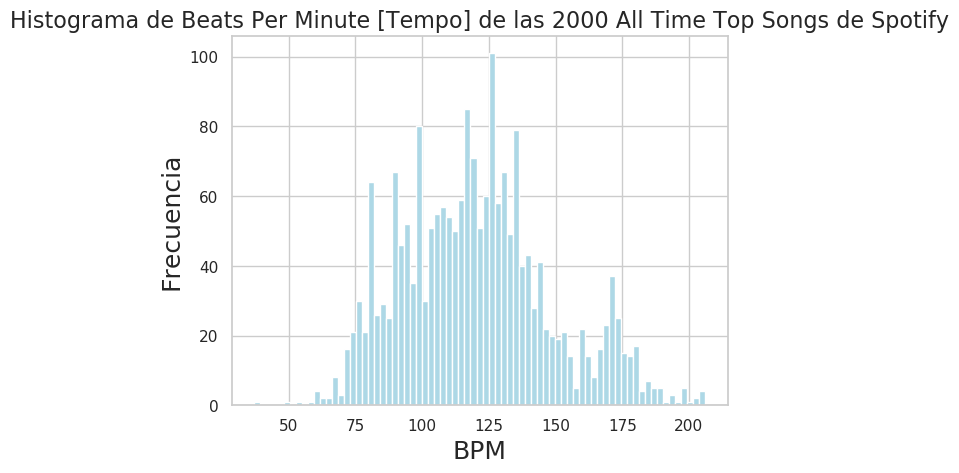

In [61]:
# Es MUY importante que el grafico tenga un correcto titulo y valores descriptivos en barras: eje x e y.
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

g = spotify_songs["Beats Per Minute (BPM)"].plot.hist(bins=75, color='lightblue')
g.set_title("Histograma de Beats Per Minute [Tempo] de las 2000 All Time Top Songs de Spotify", fontsize=16)
g.set_xlabel("BPM",fontsize=18)          #El eje x nos indican los posibles valores de BPM.
g.set_ylabel("Frecuencia", fontsize=18)  #El eje y nos indica cual es la frecuencia para los distintos valores que puede tomar BPM.

#Como vemos en el gràfico todo parece indicar que los valores de distribuciòn de BPM estàn alrededor de los 120.

Text(0, 0.5, 'Frecuencia')

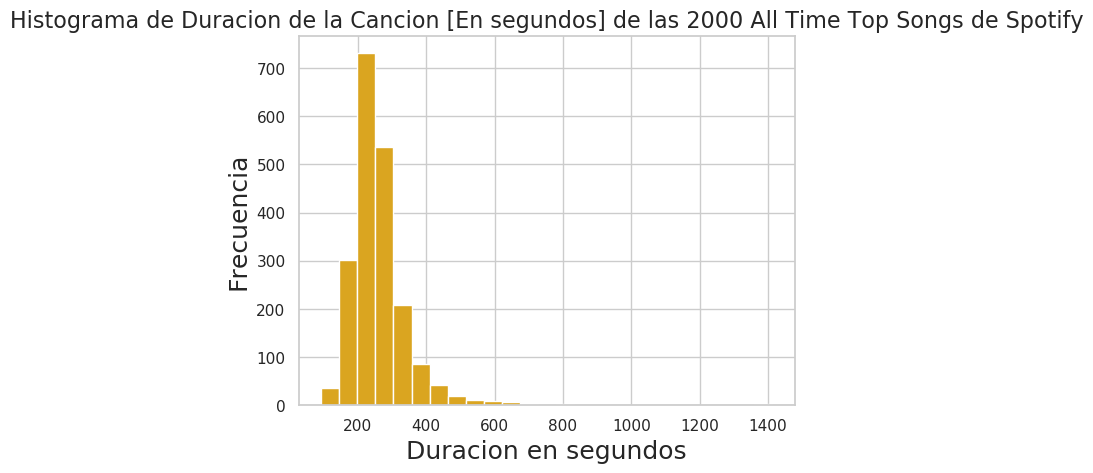

In [63]:
#Ahora hacemos el mismo gràfico para ver las duraciones de las canciones:

g = spotify_songs["Length (Duration)"].plot.hist(bins=25, color='goldenrod')
g.set_title("Histograma de Duracion de la Cancion [En segundos] de las 2000 All Time Top Songs de Spotify", fontsize=16)
g.set_xlabel("Duracion en segundos",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

#EL gràfico de abajo podemos ver que las mayorìas de las canciones rondan en torno a los 3/4 minutos (osea 180-240 segundos en el eje x).

### Density Plot

Un plot de densidad es una version continua de un histograma (ya que para nosotros no es necesario indicar el tamaño de los bins). Lo que se muestra es como se distribuye la densidad de la variable numerica a lo largo de todos sus valores posibles.

Text(0, 0.5, 'Densidad')

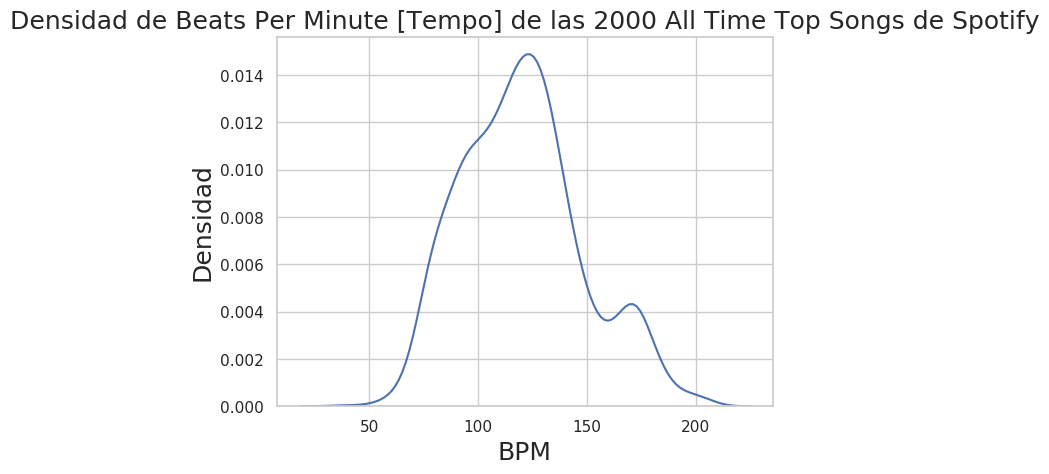

In [64]:
#Para hacer estos plots utilizamos la librerìa seaborn:
# https://seaborn.pydata.org/generated/seaborn.distplot.html

#COn hist=False:
g = sns.distplot(spotify_songs["Beats Per Minute (BPM)"], hist=False)
g.set_title("Densidad de Beats Per Minute [Tempo] de las 2000 All Time Top Songs de Spotify", fontsize=18)
g.set_xlabel("BPM",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0, 0.5, 'Densidad')

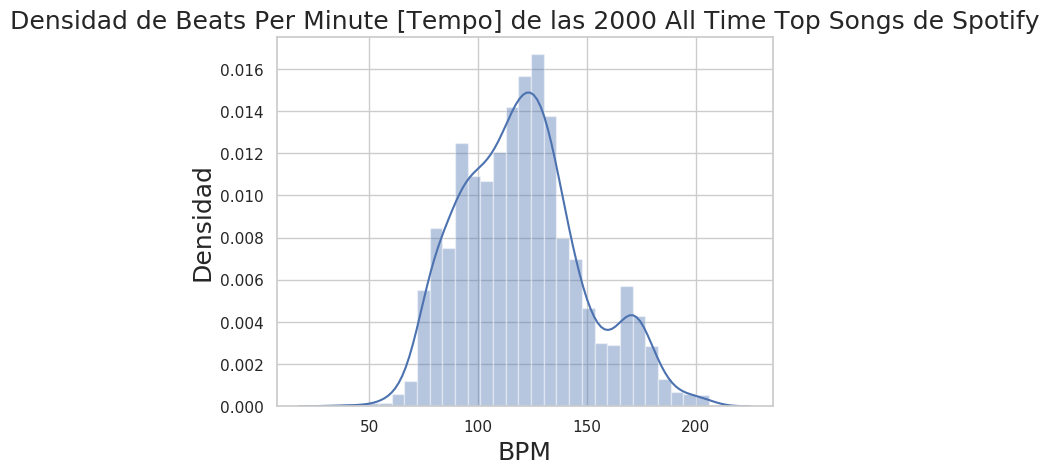

In [68]:
#Con hist=True... para que nos muestre por detràs el histograma relacionado a la funciòn de densidad para asi comparar ambos gràficos. 
g = sns.distplot(spotify_songs["Beats Per Minute (BPM)"], hist=True)
g.set_title("Densidad de Beats Per Minute [Tempo] de las 2000 All Time Top Songs de Spotify", fontsize=18)
g.set_xlabel("BPM",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0, 0.5, 'Densidad')

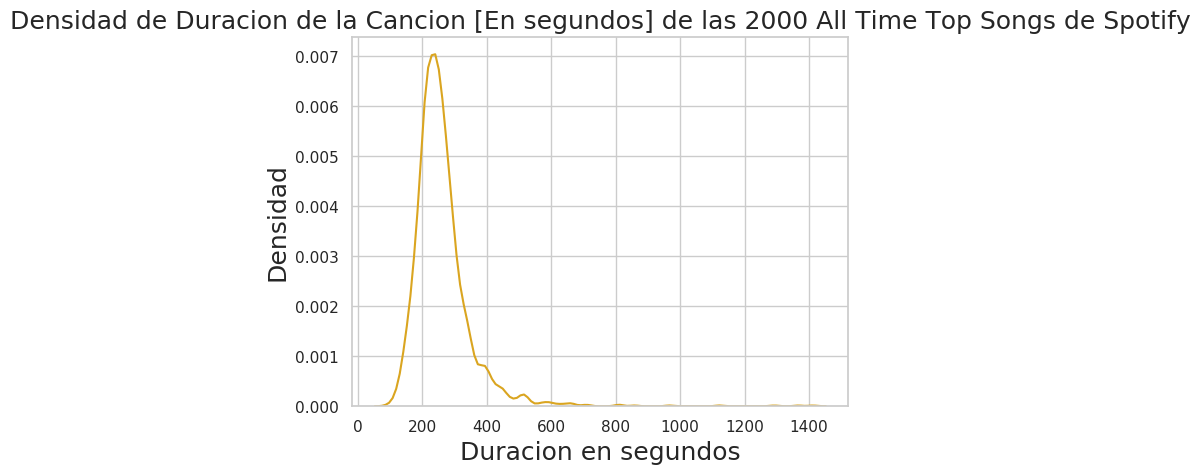

In [71]:
#Podemos hacer exactamente lo mismo (gràfico de densidad) con la duraciòn de la canciòn:

#Con hist=False:
g = sns.distplot(spotify_songs["Length (Duration)"], color='goldenrod', hist=False)
g.set_title("Densidad de Duracion de la Cancion [En segundos] de las 2000 All Time Top Songs de Spotify", fontsize=18)
g.set_xlabel("Duracion en segundos",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0, 0.5, 'Densidad')

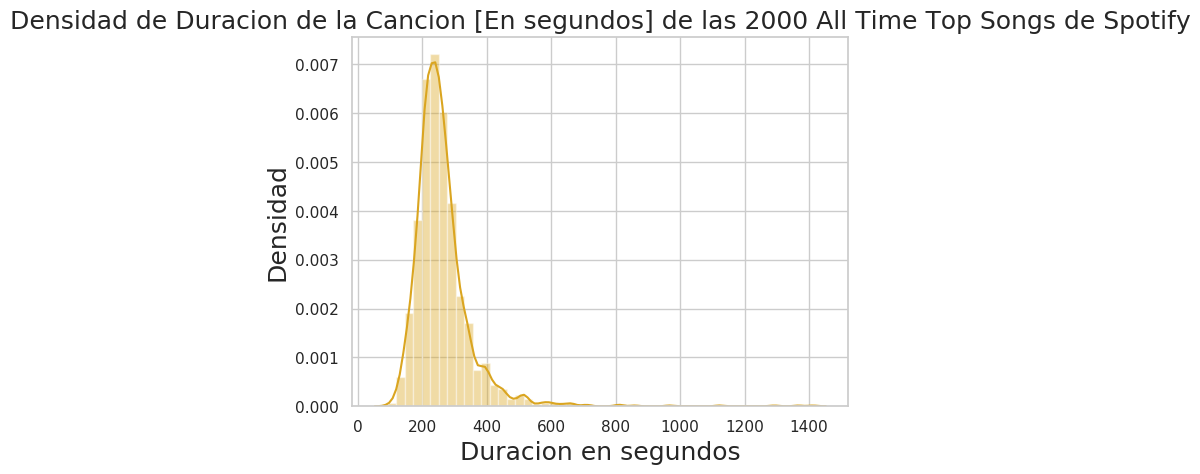

In [72]:
#Con hist=True:
g = sns.distplot(spotify_songs["Length (Duration)"], color='goldenrod', hist=True)
g.set_title("Densidad de Duracion de la Cancion [En segundos] de las 2000 All Time Top Songs de Spotify", fontsize=18)
g.set_xlabel("Duracion en segundos",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

## Overlaid Histogram y Overlaid Density Plots

Algo que serìa interesante hacer... es comparar distribuciones sobre una misma base es realizando un overlay de distintos histogramas o funciones de densidad en distintos contextos... por ej. en el set de datos anterior de QuickStarter podrìamos analizar la distribuciòn de la valiable GOAL (dinero objetivo del proyecto) vs la distribuciòn de la otra variable (con el $ que realmente llegò al proyecto). Y ver si ambas distribuciones son iguales (osea si se llegò a juntar $ para todos los poryectos o la mayorìa). Seguramente se debe ver que alguna està màs corrida que otra, lo que hace que algunos proyectos no se cumplan. --> Entonces ahì solapearìamos ambos gràficos. 
 
En este set de datos no contamos con atributos directamente comparables pero podriamos por ejemplo para distintos generos musicales calcular sus funciones de densidad y realizar una comparativa de las mismas para entender si su comportamiento es similar. Osea comparar gràficos de densidad para distintos gèneros.

Por ejemplo podriamos analizar ese comportamiento respecto al Tempo (BPM) que hemos analizado anteriormente para distintos generos musicales.

In [73]:
#Entonces hacemos un value_counts para ver los gèneros con mayor cantidad de canciones:
genres_counts = spotify_songs['Top Genre'].value_counts()
genres_counts[genres_counts > genres_counts.mean()]

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
dutch cabaret         51
classic rock          51
modern rock           49
glam rock             49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
dutch rock            18
disco                 18
glam metal            17
neo mellow            17
blues rock            15
alternative dance     15
art pop               14
Name: Top Genre, dtype: int64

Text(0, 0.5, 'Densidad')

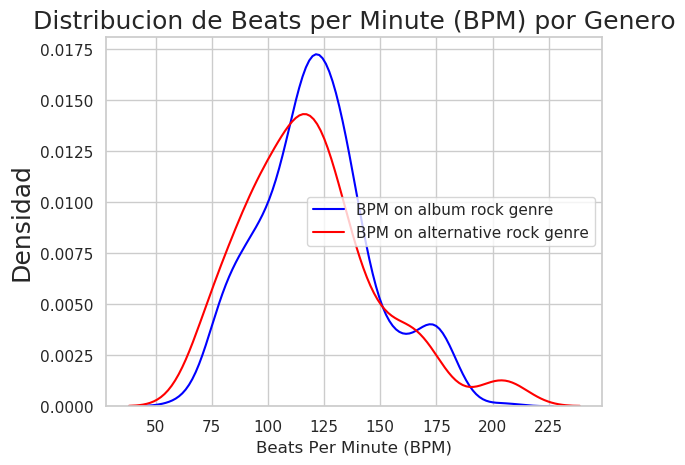

In [74]:
#De esta manera vamos a comprar 2 gèneros importantes:  album rock  y alternative rock y calculamos las distribuciones de ambos:
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]['Beats Per Minute (BPM)'], color="blue", label='BPM on album rock genre', hist=False)
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]['Beats Per Minute (BPM)'], color="red", label='BPM on alternative rock genre', hist=False)
g.set_title("Distribucion de Beats per Minute (BPM) por Genero", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

De esta manera arriba podemos comparar y analizar distintos gèneros. ANalizando arriba vemos que tienen el gènero alternativa es un poco màs lento en tèrminos de tiempo que el rock genre. 

Otro analisis posible es sobre la duracion de la canciones por genero, haciendo algo similar comparando las densidades.

Text(0, 0.5, 'Densidad')

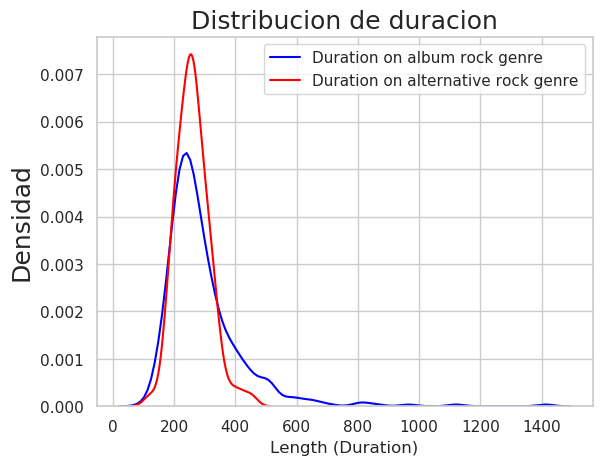

In [75]:
#Entonces hacemos lo mismo pero ahora comparando las duraciones:
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]["Length (Duration)"], color="blue", label='Duration on album rock genre', hist=False)
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]["Length (Duration)"], color="red", label='Duration on alternative rock genre', hist=False)

g.set_title("Distribucion de duracion", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Y vemos que la duraciòn de las canciones de rock alternativo es bastante màs corta (llega hasta 500 como mucho) que la duraciòn de album rock... que llega hasta 1400 algunas.

Para poder realizar estas comparaciones un poco mejor...:
Para realizar la aproximacion de la funcion de densidad, seaborn utiliza un mètodo llamado KDE (Kernel Density Estimation)... es por eso que si queremos tener mayor control sobre el plot final que queremos obtener, podemos usar la funcion ```kdeplot```, por ejemplo para visualizar de mejor forma el area sobre la curva comun entre ambos plots.

Text(0, 0.5, 'Densidad')

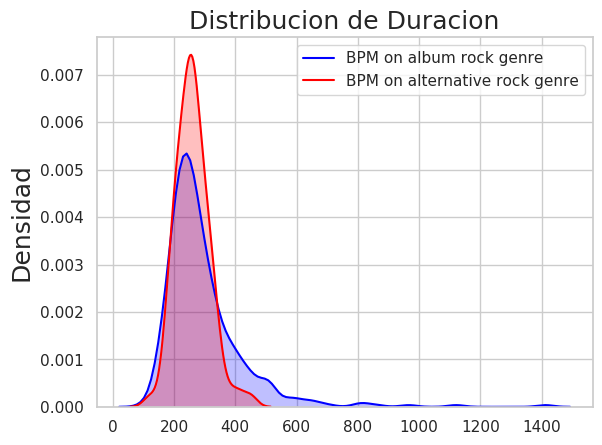

In [78]:
#Utilizamos esa funcion, kdeplot...
#Vemos que tenemos el parametro 'shade' que nos permite graficar las areas y puntos en comùn de ambas distribuciones:
g = sns.kdeplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]["Length (Duration)"], color="blue", label='BPM on album rock genre', shade=True)
g = sns.kdeplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]["Length (Duration)"], color="red", label='BPM on alternative rock genre', shade=True)

g.set_title("Distribucion de Duracion", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

#De esta manera vemos las regiones en comùn de las 2 distribuciones:

## Visualización de relaciones por pares en un conjunto de datos

### Scatter Plot

Es una de las visualizaciones mas comunes, ràpidas y versatiles. En un scatter plot representamos dos variables numericas en los ejes X e Y y por cada instancia de nuestro set de datos dibujamos un punto en las coordenadas indicadas.

Estos plots nos dan una idea de la dependencia que existe entre las dos variables y de las caracteristicas de esta dependencia: podrìa ser lineal, no-lineal, etc. Tambien podemos sumar mas dimensiones al analisis teniendo en cuenta que podemos darles distintos colores a los distintos puntos del plot.

Por ejemplo podriamos querer analizar la relacion que tenemos entre  Tempo (variable BPM) y "Energia" (variable Energy).

Text(0.5, 1.0, 'Energia vs. Beats Por Minuto (BPM)')

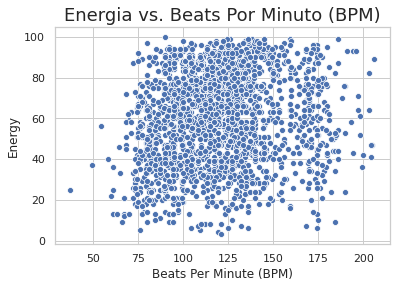

In [49]:
#Para esto utilizamos nuevamente seaborn con el mètodo scatterplot...
#Asi como parametros ponemos... en 'x' e 'y' ponemos las columnas que queremos analizar y en 'data' el DF.

g = sns.scatterplot(x="Beats Per Minute (BPM)", y="Energy", data=spotify_songs)
g.set_title("Energia vs. Beats Por Minuto (BPM)", fontsize=18)

#ABajo no vemos ninguna relaciòn entre las 2 variables... los datos estan muy dispersos. 

En este escenario por ejemplo podriamos querer analizar la relacion que tenemos entre la duracion de la cancion y la popularidad de la misma.

Text(0.5, 1.0, 'Popularidad vs. Beats Por Minuto (BPM)')

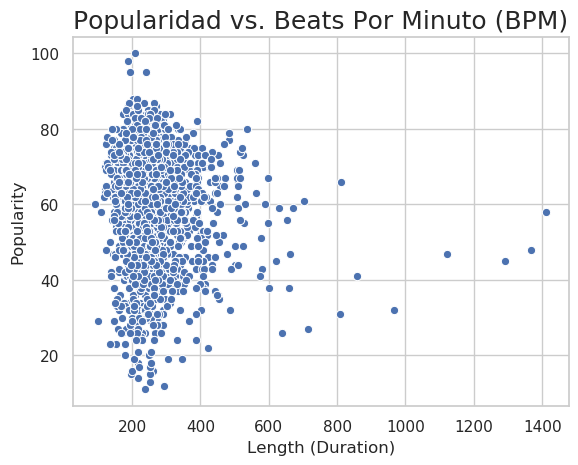

In [79]:
#Ahora vemos la relaciòn entre la duraciòn de la canciòn y su popularidad:
g = sns.scatterplot(x="Length (Duration)", y="Popularity", data=spotify_songs)
g.set_title("Popularidad vs. Beats Por Minuto (BPM)", fontsize=18)

#Y ahi vemos que la mayorìa de las canciones dura entre 200 y 400.
#Y que hay pocas canciones de mayor duraciòn, las cuales no tienen mucha popularidad. 

Podriamos tambien repetir este analisis para algunos artistas de nuestro set, por ejemplo the Beatles y Rolling Stones.

In [80]:
#Entonces ahora nos quedamos solo con canciones de The Beatles y Rolling Stones:
beatles_stones_songs = spotify_songs[(spotify_songs['Artist'] == 'The Beatles') | (spotify_songs['Artist'] == 'The Rolling Stones')]

In [52]:
beatles_stones_songs

Index  ... Popularity
148     149  ...         75
284     285  ...         34
307     308  ...         63
313     314  ...         63
318     319  ...         63
588     589  ...         58
800     801  ...         79
813     814  ...         64
820     821  ...         65
849     850  ...         72
859     860  ...         71
865     866  ...         67
894     895  ...         55
912     913  ...         72
938     939  ...         68
1012   1013  ...         55
1098   1099  ...         67
1106   1107  ...         74
1195   1196  ...         76
1197   1198  ...         58
1462   1463  ...         56
1835   1836  ...         74
1837   1838  ...         71
1844   1845  ...         69
1846   1847  ...         66
1847   1848  ...         46
1848   1849  ...         78
1849   1850  ...         77
1851   1852  ...         69
1852   1853  ...         73
1854   1855  ...         67
1857   1858  ...         74
1858   1859  ...         53
1860   1861  ...         53
1861   1862  ...         47
1863   1864  ...         78
1866   1867  ...         71
1869   1870  ...         65
1873   1874  ...         64
1879   1880  ...         63
1885   1886  ...         67
1889   1890  ...         45
1894   1895  ...         70
1897   1898  ...         58
1900   1901  ...         65
1901   1902  ...         69
1903   1904  ...         63
1904   1905  ...         68
1906   1907  ...         65
1908   1909  ...         65
1912   1913  ...         63
1922   1923  ...         74
1924   1925  ...         70
1945   1946  ...         66
1947   1948  ...         82
1949   1950  ...         76
1956   1957  ...         67
1959   1960  ...         79
1960   1961  ...         72
1981   1982  ...         50

[60 rows x 15 columns]

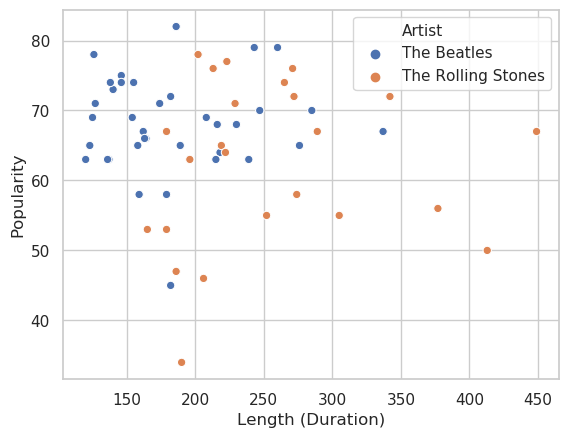

In [81]:
#Y ahora graficamos la popularidad vs duraciòn de la canciòn.... y con 'hue' le indicamos la diferenciaciòn de colores serà en base a la columna 'Artist':
sns.scatterplot(x="Length (Duration)", y="Popularity", data=beatles_stones_songs, hue="Artist")

#Y en el gràfico de abajo no vemos relaciones especìficas pero si podemos ver que 
#los Beatles tuvieron bastantes canciones populares cortas (<150 segundos) y que las canciones largas (<300) de los Rolling Stones no fueron muy populares.

### Pairplot

Tambien podriamos por ejemplo querer hacer es poder rapidamente comparar la relacion de las distribuciones de distintas variables en un DF para lo cual es muy util la funcion ```pairplot``` en seaborn.

Esta funcion nos crea una MATRIZ en la que en cada celda nos muestra la relacion entre atributos de un DF a partir de un scatter plot. Tambien en el eje diagonal nos muestra la distribucion de cada variable en forma de histograma.
Esto lo hace obviamente solo en las columnas que son numèricas. 

In [82]:
spotify_songs.info() #Vemos nuevamente las variables que teniamos. Y vemos las variables numèricas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

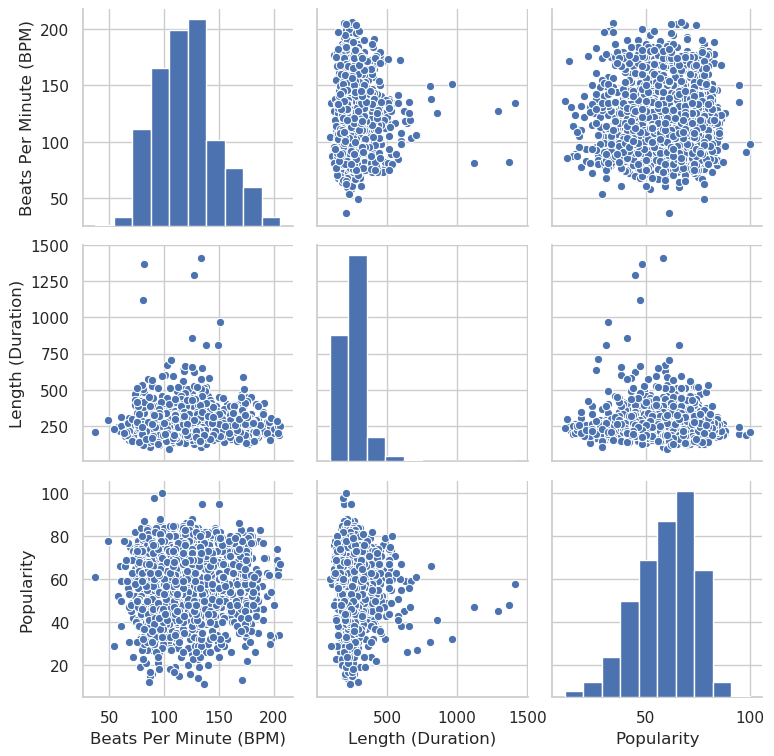

In [86]:
#Elegimos las columnas BPM, longitud y popularidad para hacer el gràfico de pair plot:
for_pairwise_analisis = spotify_songs[['Beats Per Minute (BPM)','Length (Duration)','Popularity']]
sns.pairplot(for_pairwise_analisis)

#Y abajo vemos que tenemos bastantes de los gràficos que hicimos hasta el momento de densidad e histograma. 
#En las diagonales tenemos los histogramas (ya que no tenemos 2 variables a comparar) y en el
#resto de los cuadros tenemos gràficos de dispersiòn donde ahi si comparamos 2 variable.

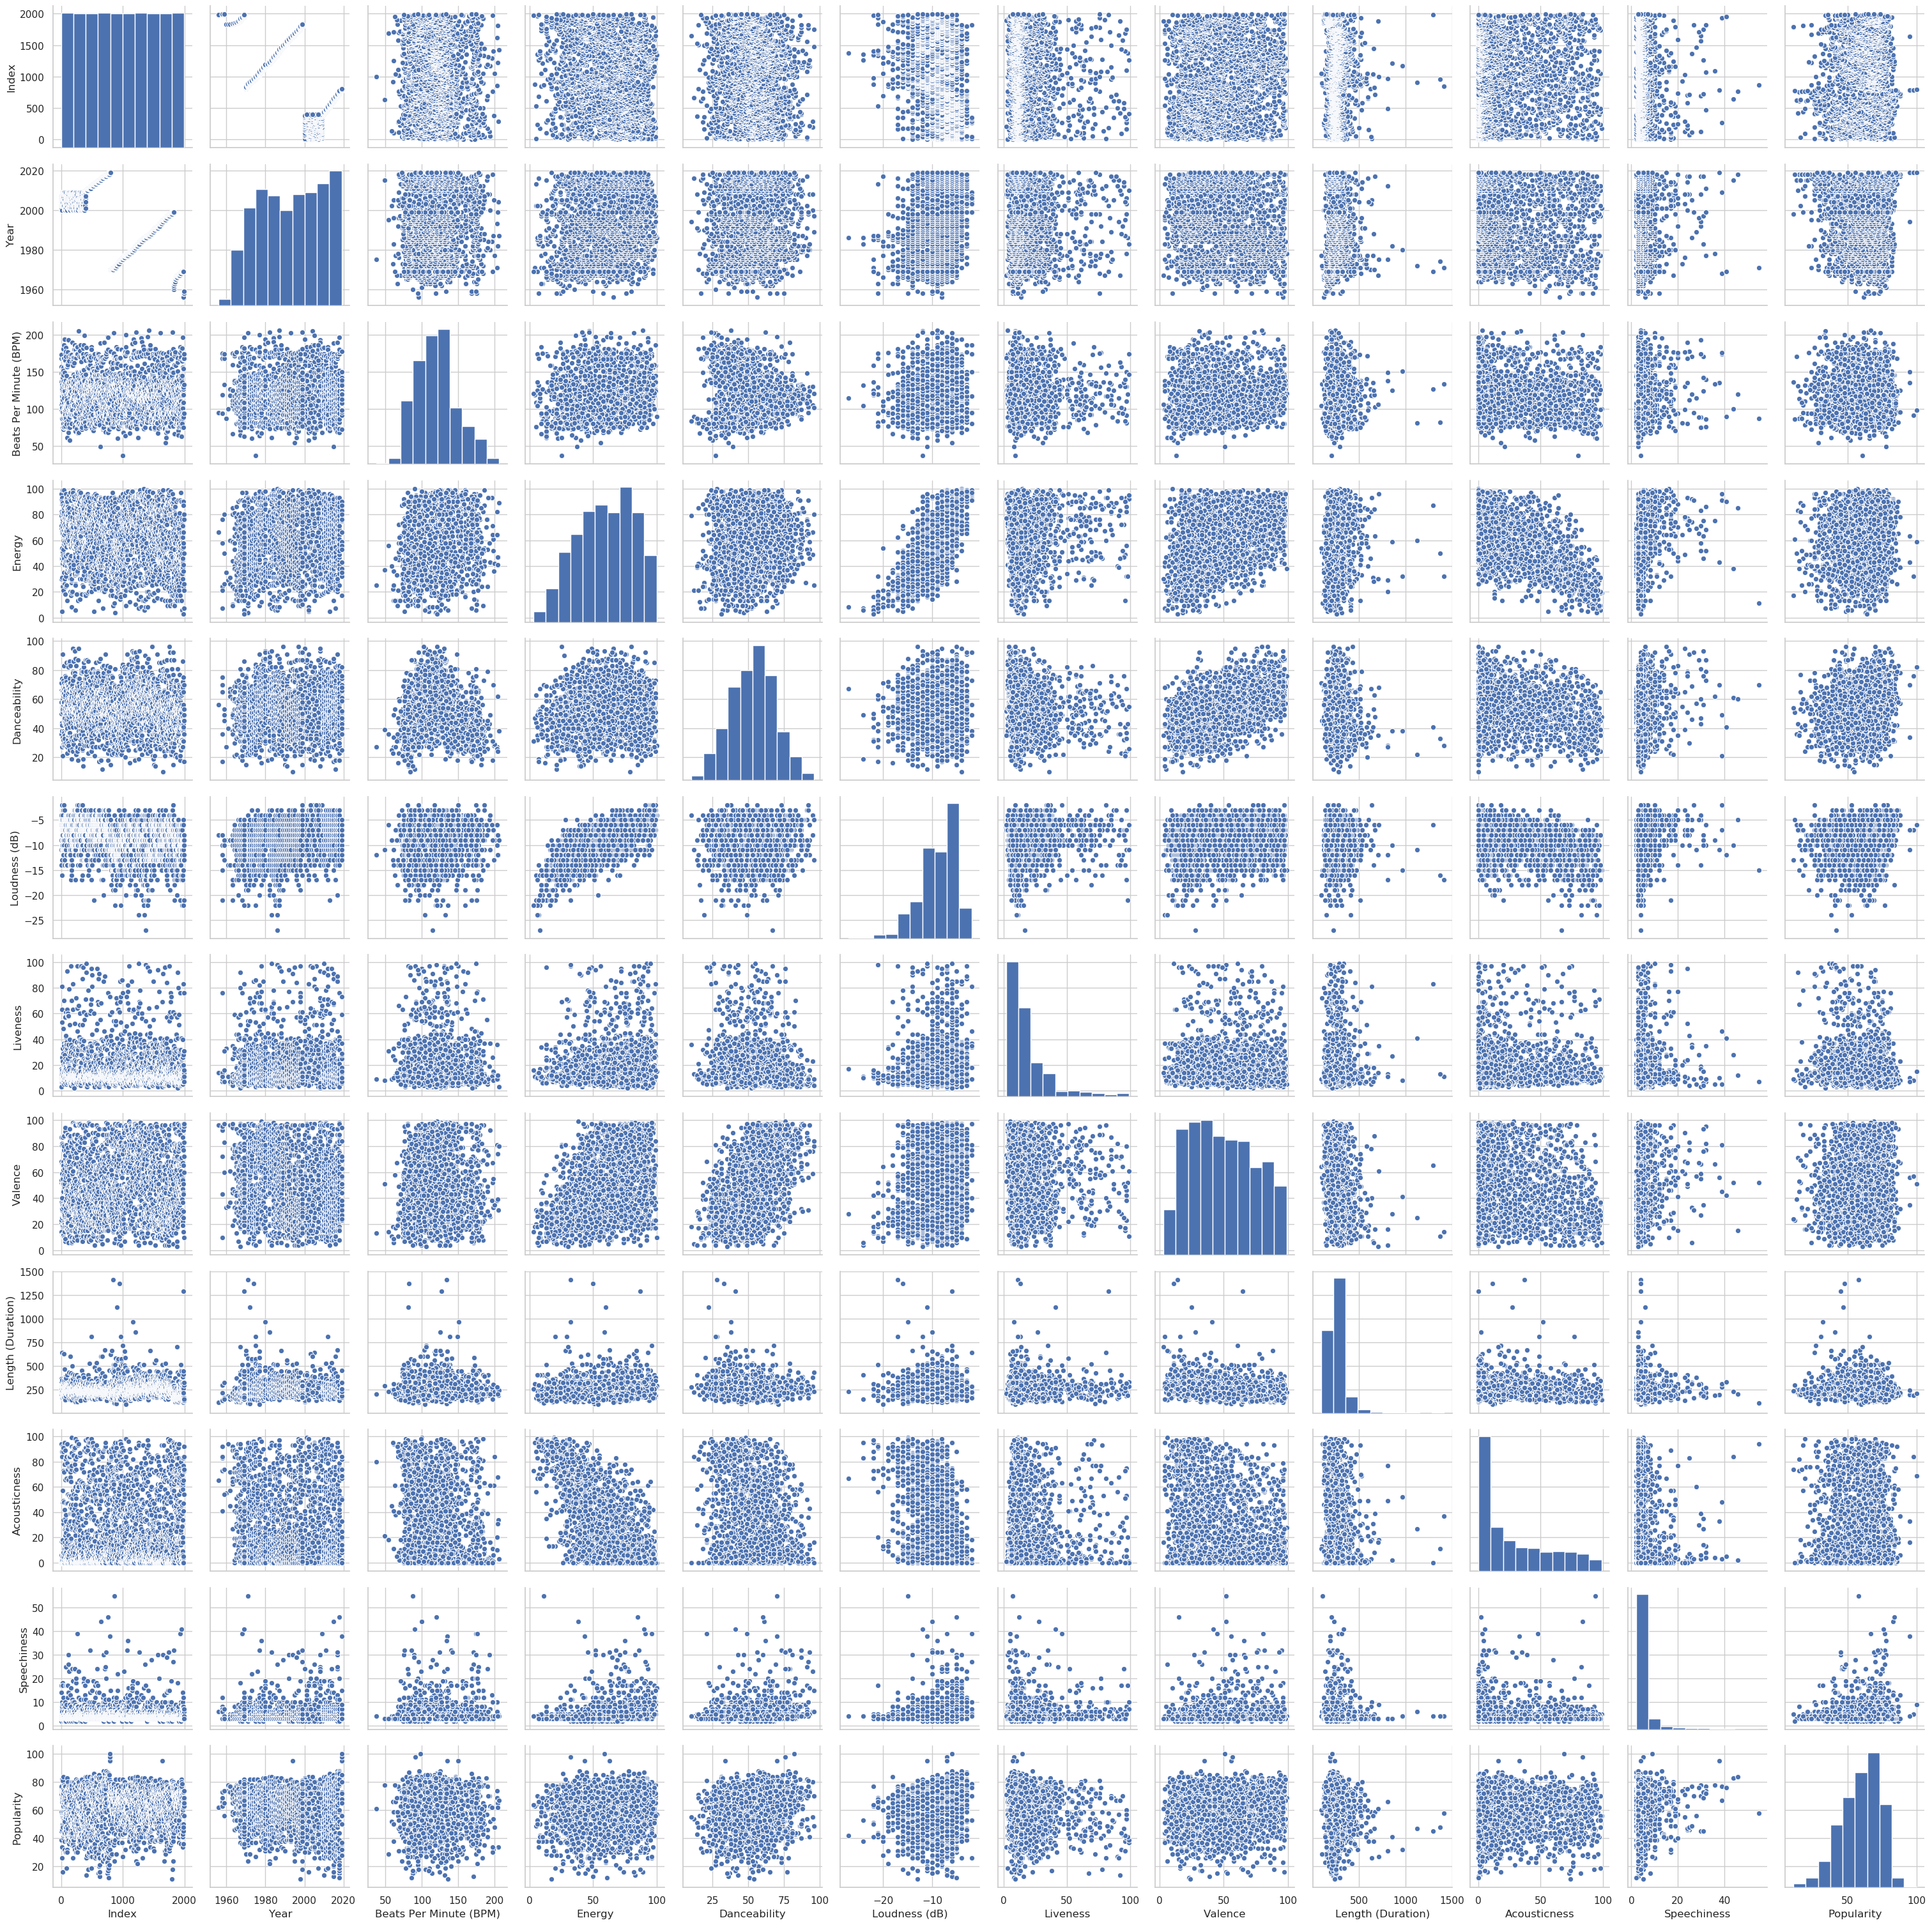

In [87]:
#SI quisieramos comparar todas las columnas del DF (obviamente solo las numèricas):
sns.pairplot(spotify_songs)

Para una guia detallada de visualizacion de distribuciones utilizando seaborn, pueden consultar el siguiente link: https://seaborn.pydata.org/tutorial/distributions.html

## Analizando Artistas con Mayor Representacion en el set

Otro aspecto que podriamos considerar es analizar aquellos artistas que tienen mayor representacion en el set, para ello podemos sacar inicialmente algunas estadisticas que pueden servirnos para el analisis en relacion a su media y desvio.

In [57]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [58]:
spotify_songs['Artist'].value_counts() 
#VEmos los 5 primeros artistas que tenemos con mayor cantidad de canciones: 

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
                      ..
Killing Joke           1
Emeli Sandé            1
Patrick Hernandez      1
Hozier                 1
Hero                   1
Name: Artist, Length: 731, dtype: int64

Para fines de la presentacion, vamos a tomar aquellos artistas que tienen mas de 24 canciones, para tomar asi los artistas que tienen mas canciones en el set.

In [88]:
#Para esto hacemos un groupby por artista y filtramos solo los que tienen longitud de la secciòn del groupby >=24:
songs_by_main_artists = spotify_songs.groupby("Artist").filter(lambda x: len(x) >= 24)

In [90]:
songs_by_main_artists['Artist'].value_counts()   #De esta manera nos quedamos con los 5 primeros.

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
Name: Artist, dtype: int64

In [91]:
songs_by_main_artists #Vemos que tenemos 150 canciones solo de estos 4 artistas.

Index                                    Title              Artist  \
16       17                           Speed of Sound            Coldplay   
20       21                                  Fix You            Coldplay   
30       31                            The Scientist            Coldplay   
37       38                    The Saints Are Coming                  U2   
56       57  Sometimes You Can't Make It On Your Own                  U2   
...     ...                                      ...                 ...   
1949   1950                            Gimme Shelter  The Rolling Stones   
1956   1957       You Can't Always Get What You Want  The Rolling Stones   
1959   1960          Come Together - Remastered 2009         The Beatles   
1960   1961              Something - Remastered 2009         The Beatles   
1981   1982                         Midnight Rambler  The Rolling Stones   

             Top Genre  Year  Beats Per Minute (BPM)  Energy  Danceability  \
16      permanent wave  2005                     123      90            52   
20      permanent wave  2005                     138      42            21   
30      permanent wave  2002                     146      44            56   
37          irish rock  2006                     152      81            32   
56          irish rock  2004                      96      60            53   
...                ...   ...                     ...     ...           ...   
1949        album rock  1969                     119      63            63   
1956        album rock  1969                      86      62            32   
1959  british invasion  1969                     165      38            53   
1960  british invasion  1969                     134      34            40   
1981        album rock  1969                      75      66            40   

      Loudness (dB)  Liveness  Valence  Length (Duration)  Acousticness  \
16               -7         7       36                288             0   
20               -9        11       12                296            16   
30               -7        11       21                310            73   
37               -7        15       12                202             8   
56               -6        11       35                305             0   
...             ...       ...      ...                ...           ...   
1949             -8        17       49                271            45   
1956            -10        25       47                449            64   
1959            -12         9       19                260             3   
1960            -11        14       38                182            20   
1981            -10        17       51                413            77   

      Speechiness  Popularity  
16              6          69  
20              3          81  
30              2          84  
37              5          40  
56              2          57  
...           ...         ...  
1949            3          76  
1956            6          67  
1959            4          79  
1960            3          72  
1981           12          50  

[150 rows x 15 columns]

Con estos datos seleccionados podemos calcular algunas estadisticas, por ejemplo media y desvio para el Tempo y duracion de sus canciones.

In [92]:
print("Calculando la media de los artistas mas frecuentes en el set de datos")
print(round(songs_by_main_artists.groupby(["Artist"])["Beats Per Minute (BPM)", "Length (Duration)"].mean(),2))

Calculando la media de los artistas mas frecuentes en el set de datos
                    Beats Per Minute (BPM)    Length (Duration)
Artist                                                         
Coldplay                            127.00               274.78
Queen                               103.30               250.70
The Beatles                         119.22               184.58
The Rolling Stones                  118.21               254.92
U2                                  127.00               273.81


In [93]:
print("Calculando el desvio de los artistas mas frecuentes en el set de datos")
print(round(songs_by_main_artists.groupby(["Artist"])["Beats Per Minute (BPM)", "Length (Duration)"].std(),2))

Calculando el desvio de los artistas mas frecuentes en el set de datos
                    Beats Per Minute (BPM)    Length (Duration)
Artist                                                         
Coldplay                             25.76                40.34
Queen                                26.22                58.47
The Beatles                          27.25                52.93
The Rolling Stones                   27.77                76.02
U2                                   25.74                49.43


In [94]:
#Si quisieramos ver la info de arriba gràfica/visualmente utilizarìamos BOXPLOT...

## Boxplot

Esta visualizaciòn se utiliza para ver la distribucion de una variable numerica de acuerdo a una variable categorica (en este vamos a utilizar nuestros 5 posibles artistas).

Text(0, 0.5, 'BPM')

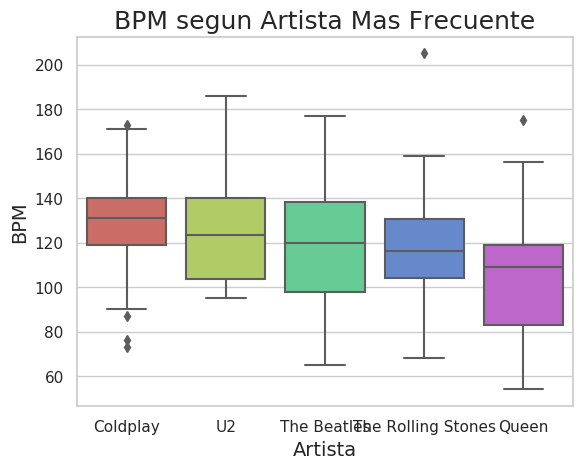

In [97]:
#Utilizamos seaborn para esto... donde nuestra columna x serà artista y nuestra columna y BPM... y en 'data' nuestro DF.
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

g = sns.boxplot(x="Artist", y="Beats Per Minute (BPM)", 
                     data=songs_by_main_artists, palette="hls")
g.set_title("BPM segun Artista Mas Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("BPM", fontsize=14)

#Y abajo vemos que para Coldplay tiene un BPM entre 120 y 140... mientras que Queen entre 85 y 120.
#Cada una de estas cajas representa a cada una de los distintos artistas. 
#La caja del bloxplot va del 1er al 3er quartil... (el area en color). 
#De esta manera en la caja estàn los 50% de los datos... y debajo de la caja (por ej. en la caja roja del 120 al 90 aprox.) tenemos un 25%.
#Y el otro 25% de los datos estan sobre la caja (en el caso de la caja roja del 140 al 170 de BPM aprox.)

#Y por ùltimo los "puntos que vemos"... por ejemplo el que està en 210 para la caja azul... son VALORES ANOMALOS-outliers (VER BIEN QUE SERIA ESTO).
#Y la LINEA del medio de las cajas es el valor de media... por ej. para coldplay tiene una media de 130 BPM aprox.

Text(0, 0.5, 'Length (Duration)')

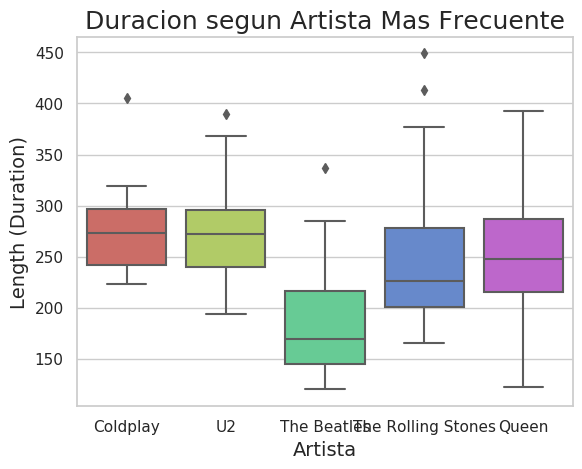

In [98]:
#Ahora hacemos lo mismo  para Artista vs Lenght de la canciòn.

g = sns.boxplot(x="Artist", y="Length (Duration)", 
                     data=songs_by_main_artists, palette="hls")
g.set_title("Duracion segun Artista Mas Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("Length (Duration)", fontsize=14)

#Y vemos por ej. abajo que la media de las canciones de COldplay son de 270 seg y las de The Beatles son mucho menor... de 170 seg.

Para leerlo tenemos que considerar que la 'caja' del boxplot va desde el primer al tercer cuantil, es decir que el 25% de los datos estan por debajo de la caja y el 25% de los datos estan por encima de la caja. La caja concentra entonces el 50% de los datos. Las lıneas que salen de la caja van desde el primer cuantil hasta el valor minimo y maximo y los puntos son valores anomalos (outliers).

# Generos con mayor cantidad de canciones

Pasando a las variables categoricas podriamos querer analizar cuales son los generos que tienen la mayor cantidad de canciones.

In [103]:
#VEmos los generos que tienen mayor cantidad de canciones:
main_genres_counts = spotify_songs["Top Genre"].value_counts()
main_genres_counts

album rock               413
adult standards          123
dutch pop                 88
alternative rock          86
dance pop                 83
                        ... 
alaska indie               1
uk pop                     1
ccm                        1
streektaal                 1
australian indie folk      1
Name: Top Genre, Length: 149, dtype: int64

In [104]:
#FIltramos los gèneros que tienen una mayor cantidad promedio de canciones -->  > main_genres_counts.mean():
main_genres_counts = main_genres_counts[main_genres_counts > main_genres_counts.mean()]
main_genres_counts

#Y entonces abajo tenemos una lista de valores que podemos utilizarlos para visualizarlos.

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
dutch cabaret         51
classic rock          51
modern rock           49
glam rock             49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
dutch rock            18
disco                 18
glam metal            17
neo mellow            17
blues rock            15
alternative dance     15
art pop               14
Name: Top Genre, dtype: int64

In [105]:
#Una forma de poder visualizar este tipo de informacion es utilizando un Bar Plot... ver abajo.

## Bar Plot

Esta visualizaciòn es de uso bastante popular y donde se cometen muchos errores. Algunas cosas que hay que tener en cuenta es que una de las variables a considerar deben ser CATEGÒRICAS y por otro lado, los valores a evaluar deben comenzar en 0.

Existen otras variantes haciendo stacking de valores o directamente indicandolos en barras separadas de forma de que queden agrupados: por ej. se puede hacer una doble categorizaciòn.

Text(0, 0.5, 'Genero')

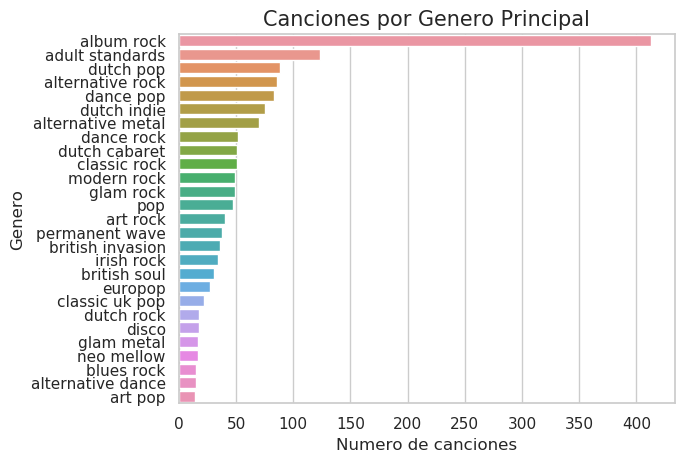

In [107]:
#Utilizamos para esto seaborn con el mètodo barplot. EN x utilizamos los valores de la serie directamente y en y sus nombres (osea .index) y le ponemos orientaciòn Horizonal: 
# https://seaborn.pydata.org/generated/seaborn.barplot.html
g = sns.barplot(x=main_genres_counts.values, y=main_genres_counts.index, orient='h')
g.set_title("Canciones por Genero Principal", fontsize=15)
g.set_xlabel("Numero de canciones", fontsize=12)
g.set_ylabel("Genero", fontsize=12)

#Y como vemos abajo tenemos una muy gran cantidad de canciones de album rock y los demàs generos estàn bastantes repartidos.
#Estas son variables CATEGÒRICAS! Tener en cuenta esto.